<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.973157,28.960157,63.207238,26.344418,-1.337471,189.147498,190.524515,-1.377017
1,0.0,1.0,90.997366,80.181675,57.999644,30.921770,-1.351888,268.748569,270.512164,-1.763595
2,0.0,2.0,99.901485,32.381101,97.987926,35.312995,-0.166569,275.416938,275.059575,0.357363
3,0.0,3.0,53.181459,55.641488,91.891161,46.875579,3.468377,261.058063,257.073124,3.984939
4,0.0,4.0,34.059145,86.006048,69.392514,91.811976,-3.724882,287.544801,290.611403,-3.066601
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.088498,42.593006,73.212408,53.173567,-2.843099,272.224381,276.302239,-4.077859
59996,999.0,56.0,72.468916,48.421973,94.405785,59.621957,-0.689460,284.229172,285.736941,-1.507769
59997,999.0,57.0,59.968864,92.196216,63.612571,24.673446,-1.570675,248.880423,250.281921,-1.401499
59998,999.0,58.0,77.218322,88.059707,36.745715,46.693000,-1.190979,257.525766,258.691539,-1.165774


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.973157,28.960157,63.207238,26.344418,-1.337471,189.147498,190.524515,-1.377017
1,0.0,1.0,90.997366,80.181675,57.999644,30.921770,-1.351888,268.748569,270.512164,-1.763595
2,0.0,2.0,99.901485,32.381101,97.987926,35.312995,-0.166569,275.416938,275.059575,0.357363
3,0.0,3.0,53.181459,55.641488,91.891161,46.875579,3.468377,261.058063,257.073124,3.984939
4,0.0,4.0,34.059145,86.006048,69.392514,91.811976,-3.724882,287.544801,290.611403,-3.066601
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.088498,42.593006,73.212408,53.173567,-2.843099,272.224381,276.302239,-4.077859
59996,999.0,56.0,72.468916,48.421973,94.405785,59.621957,-0.689460,284.229172,285.736941,-1.507769
59997,999.0,57.0,59.968864,92.196216,63.612571,24.673446,-1.570675,248.880423,250.281921,-1.401499
59998,999.0,58.0,77.218322,88.059707,36.745715,46.693000,-1.190979,257.525766,258.691539,-1.165774


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.973157  28.960157  63.207238  26.344418 -1.337471  189.147498   
      1.0    90.997366  80.181675  57.999644  30.921770 -1.351888  268.748569   
      2.0    99.901485  32.381101  97.987926  35.312995 -0.166569  275.416938   
      3.0    53.181459  55.641488  91.891161  46.875579  3.468377  261.058063   
      4.0    34.059145  86.006048  69.392514  91.811976 -3.724882  287.544801   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   96.088498  42.593006  73.212408  53.173567 -2.843099  272.224381   
      56.0   72.468916  48.421973  94.405785  59.621957 -0.689460  284.229172   
      57.0   59.968864  92.196216  63.612571  24.673446 -1.570675  248.880423   
      58.0   77.218322  88.059707  36.745715  46.693000 -1.190979  257.525766   
      59.0   82.116447  92.307349  57.328560  62.085601 -0.035816  303.802142   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    190.524515 -1.377017  
      1.0    270.512164 -1.763595  
      2.0    275.059575  0.357363  
      3.0    257.073124  3.984939  
      4.0    290.611403 -3.066601  
...                 ...       ...  
999.0 55.0   276.302239 -4.077859  
      56.0   285.736941 -1.507769  
      57.0   250.281921 -1.401499  
      58.0   258.691539 -1.165774  
      59.0   303.921249 -0.119107  

[60000 rows x 8 columns]

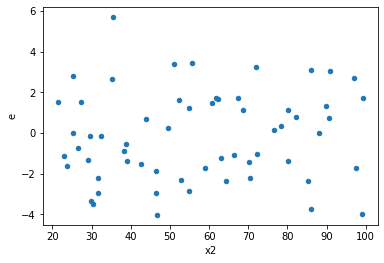

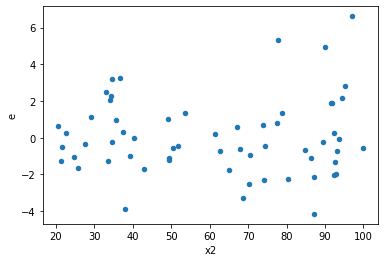

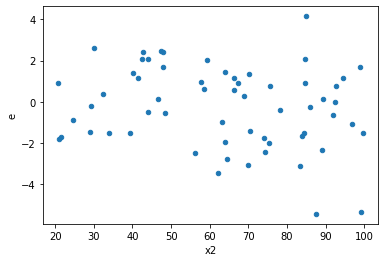

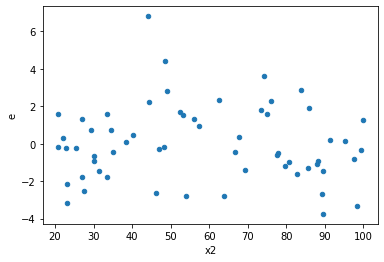

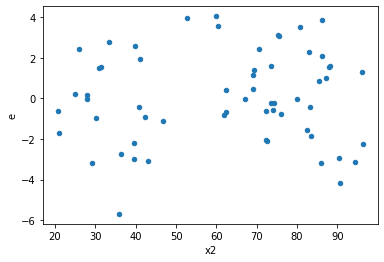

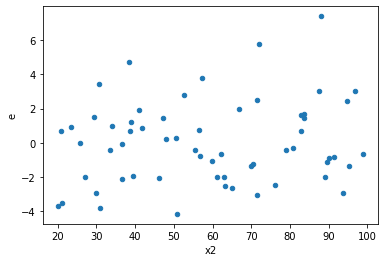

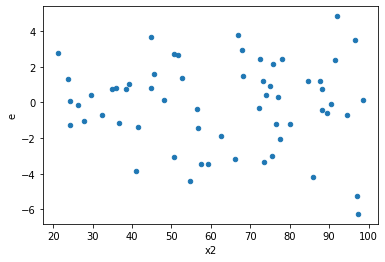

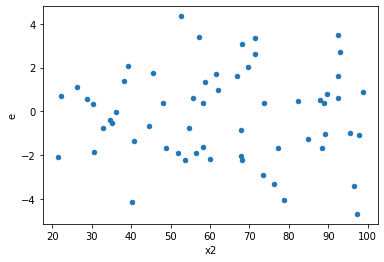

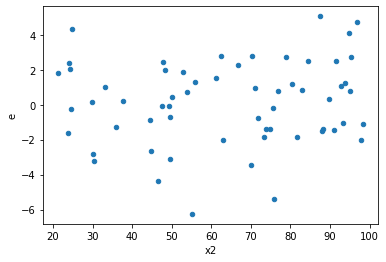

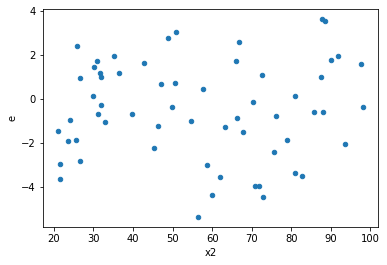

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,25.0,27.0,96.76962667796025,123.81925015160957,3.87078506711841,4.585898153763317,1.1847462657432617,0.6649929082288826,0.6675035458855587,0.3324964541144413,Reject001=1 : Homoscedasticity
8.0,28.0,24.0,146.23215582447762,160.46587492154393,5.2225769937313435,6.686078121730997,1.2802258597156717,0.5424791425276942,0.7287604287361529,0.2712395712638471,Reject001=1 : Homoscedasticity
10.0,26.0,26.0,108.13461958803664,136.67423747957218,4.159023830309102,5.256701441522007,1.2639267424277598,0.5546715705858896,0.7226642147070552,0.2773357852929448,Reject001=1 : Homoscedasticity
11.0,26.0,26.0,90.5833768352258,145.79240416421516,3.4839760321240694,5.607400160162121,1.6094829896816103,0.2316215671270374,0.8841892164364813,0.1158107835635187,Reject001=1 : Homoscedasticity
12.0,27.0,25.0,151.96438643116844,166.97779291332765,5.628310608561794,6.6791117165331055,1.1866992035536972,0.6700161949607795,0.6649919025196103,0.33500809748038973,Reject001=1 : Homoscedasticity
13.0,26.0,26.0,108.63079835523158,129.54156225005164,4.178107629047369,4.98236777884814,1.1924938802938752,0.6568579619851551,0.6715710190074224,0.32842898099257756,Reject001=1 : Homoscedasticity
17.0,21.0,31.0,82.38744925360426,169.70937897357553,3.9232118692192506,5.474496095921791,1.3954117897311669,0.39074791741818204,0.804626041290909,0.19537395870909102,Reject001=1 : Homoscedasticity
18.0,25.0,27.0,100.07014417823213,111.21134418468607,4.002805767129285,4.118938673506891,1.0290128757511243,0.9384354890281319,0.530782255485934,0.46921774451406595,Reject001=1 : Homoscedasticity
22.0,30.0,22.0,160.620497706486,168.30876262263422,5.3540165902162,7.650398301028829,1.4289082172455312,0.38994326480489194,0.805028367597554,0.19497163240244597,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,132.49463258052737,86.14171884316447,5.095947406943361,3.3131430324294024,0.6501525168637257,0.27877698530003586,Reject001=1 : Homoscedasticity
1.0,35.0,17.0,149.86381025502135,61.146621908549626,4.281823150143467,3.596860112267625,0.8400300493837791,0.6417947748734812,Reject001=1 : Homoscedasticity
2.0,18.0,34.0,69.46190203226404,83.96326998654678,3.858994557348002,2.4695079407807876,0.6399355853141953,0.3163439951881724,Reject001=1 : Homoscedasticity
3.0,29.0,23.0,111.57025616210818,72.6331459994027,3.847250212486489,3.1579628695392477,0.8208363623686038,0.6086975961554525,Reject001=1 : Homoscedasticity
4.0,24.0,28.0,151.14948789286893,129.20740331970705,6.297895328869539,4.614550118560966,0.7327130537416012,0.4423637383135147,Reject001=1 : Homoscedasticity
5.0,27.0,25.0,176.12635524236617,110.60870810909832,6.5231983423098585,4.424348324363932,0.6782483211751116,0.3250788928617066,Reject001=1 : Homoscedasticity
6.0,23.0,29.0,188.75400778595963,82.6002987697434,8.206695990693897,2.8482861644739104,0.3470685605636868,0.01130054616588612,Reject001=1 : Homoscedasticity
7.0,25.0,27.0,96.76962667796025,123.81925015160957,3.87078506711841,4.585898153763317,1.1847462657432617,0.6649929082288826,Reject001=1 : Homoscedasticity
8.0,28.0,24.0,146.23215582447762,160.46587492154393,5.2225769937313435,6.686078121730997,1.2802258597156717,0.5424791425276942,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64